## Trafic Sign Classification using CNN

In [1]:
# To load dataset directly from kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
# downloading the Dataset
! kaggle datasets download -d sergeykulakin/russian-road-signs-categories-dataset

100% 3.82G/3.84G [00:24<00:00, 187MB/s]
100% 3.84G/3.84G [00:24<00:00, 170MB/s]


In [4]:
#! unzip /content/russian-road-signs-categories-dataset.zip

Importing the required libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm

In [66]:
img = cv2.imread("/content/test/1/1_7000.png")

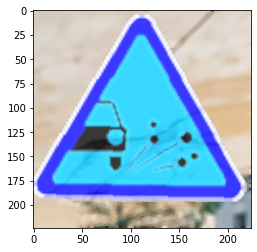

In [67]:
# sample image
plt.imshow(img)

In [68]:
# reshaping the image size to 100,100,3
half = cv2.resize(img, (100, 100))

In [69]:
half.shape

(100, 100, 3)

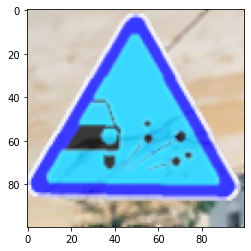

In [70]:
# image after reshaping
plt.imshow(half)

reading all train images with labels

In [71]:
temp = []
train_y = []
for j in tqdm(range(1,9)):
  for i in range(7000):
    img = cv2.imread(f"/content/train/{j}/{j}_{i}.png")
    half_img = cv2.resize(img, (100, 100))
    temp.append(half_img)
    train_y.append(j-1)

100%|██████████| 8/8 [02:49<00:00, 21.17s/it]


In [72]:
# converting it into numpy array
train = np.array(temp)
train_y = np.array(train_y)

In [73]:
print(train.shape)
print(train[0].shape)
print(type(train))

(56000, 100, 100, 3)
(100, 100, 3)
<class 'numpy.ndarray'>


In [74]:
print(train_y[1:5])
len(train_y)

[0 0 0 0]


56000

reading all test images with labes

In [75]:
temp1 = []
test_y = []
for j in tqdm(range(1,9)):
  for i in range(7000,10000):
    img = cv2.imread(f"/content/test/{j}/{j}_{i}.png")
    half_img = cv2.resize(img, (100, 100))
    temp1.append(half_img)
    test_y.append(j-1)

100%|██████████| 8/8 [01:02<00:00,  7.75s/it]


In [76]:
test = np.array(temp1)
test_y = np.array(test_y)

In [77]:
print(test.shape)
print(test[0].shape)
print(type(test))

(24000, 100, 100, 3)
(100, 100, 3)
<class 'numpy.ndarray'>


In [78]:
print(test_y[3:8])
len(test_y)

[0 0 0 0 0]


24000

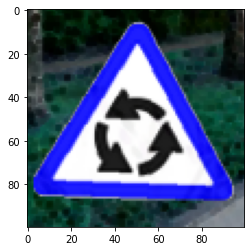

In [79]:
plt.imshow(test[789])

In [80]:
train_y.shape

(56000,)

In [81]:
train_y

array([0, 0, 0, ..., 7, 7, 7])

In [ ]:
#X_train = train/255.0
#X_test = test/255.0

one hot encoding 

In [82]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [83]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Creating the model

In [89]:

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

In [90]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3),activation= "relu", input_shape = (100,100,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters = 256, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    # layers.Dense(128, activation = "relu"),
    # layers.Dense(64, activation = "relu"),
    # layers.Dense(32, activation = "relu"),
    # layers.Dense(5, activation = "relu"),
    layers.Dense(8, activation = "softmax")

])

In [91]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 128)     

compiling

In [92]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fitting the model

In [93]:
result = cnn.fit(train, y_train, epochs=3 )

Epoch 1/3
1750/1750 [==============================] - 1230s 702ms/step - loss: 0.3495 - accuracy: 0.8877
Epoch 2/3
1750/1750 [==============================] - 1244s 711ms/step - loss: 0.0816 - accuracy: 0.9737
Epoch 3/3
1750/1750 [==============================] - 1231s 704ms/step - loss: 0.0549 - accuracy: 0.9840


Evaluating the model on test data

In [94]:
result_test = cnn.evaluate(test, y_test)

750/750 [==============================] - 148s 196ms/step - loss: 0.0550 - accuracy: 0.9825


Ploting the Graphs of accuracy and loss

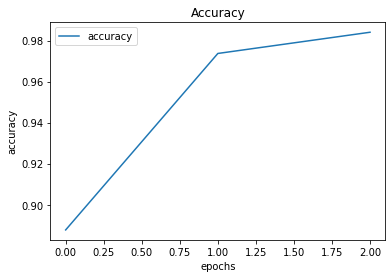

In [100]:
plt.figure(0)
plt.plot(result.history['accuracy'], label='accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

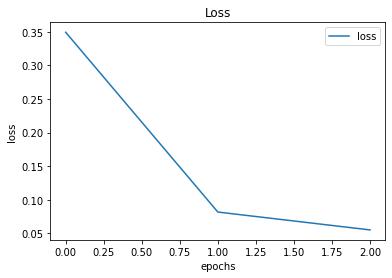

In [101]:
plt.plot(result.history['loss'], label='loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Saving the model 

In [106]:
cnn.save('Trafic_sign_Pred_model.h5')

Load the model

In [107]:
from keras.models import load_model
model = load_model('/content/Trafic_sign_Pred_model.h5')

Extracted the class names (lables) from wikipedia 
to cross check the Here:  https://en.wikipedia.org/wiki/Road_signs_in_Russia

In [109]:
classes = {
    0:"Warning sign",
    1:"Priority sign",
    2:"Forbidding sign",
    3:"Prescriptive sign",
    4:"special regulation sign",
    5:"Information sign",
    6:"Service Marks sign",
    7:"Additional Information signl"
    }

In [114]:
y_pred = cnn.predict(test)
y_pred[:5]

array([[1.0000000e+00, 5.8724416e-09, 4.0520053e-15, 6.0789716e-24,
        2.4928726e-10, 1.7282538e-11, 1.2891135e-17, 7.9753538e-13],
       [1.0000000e+00, 8.1564475e-14, 1.4615872e-25, 1.1497732e-37,
        1.0448239e-18, 5.0991680e-16, 4.4985329e-27, 1.7077589e-17],
       [1.0000000e+00, 8.3258016e-20, 5.3435791e-30, 0.0000000e+00,
        1.2550784e-18, 1.6711132e-20, 1.9253697e-28, 1.7399496e-22],
       [1.0000000e+00, 9.8049302e-10, 2.5359677e-17, 8.1424358e-27,
        8.4243593e-13, 9.1247197e-11, 8.1445463e-20, 1.9899280e-12],
       [1.0000000e+00, 4.2818669e-27, 6.9661903e-34, 0.0000000e+00,
        9.3895344e-33, 4.0726112e-17, 0.0000000e+00, 5.8290422e-28]],
      dtype=float32)

In [116]:
# finding the max number from the array
y_classes = [np.argmax(element) for element in y_pred]

In [118]:
y_classes[:5]

[0, 0, 0, 0, 0]

In [119]:
test_y[:5]

array([0, 0, 0, 0, 0])

Checking the images

In [120]:
def plot_img(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

randomly picking the images and printing the actual and predicted lables

Predicted:  Warning sign
Acutal: 


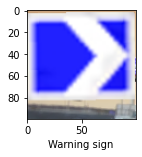

In [132]:
plot_img(test, test_y, 543)
print("Predicted: ", classes[y_classes[543]])
print("Acutal: ")

Predicted:  Forbidding sign
Acutal: 


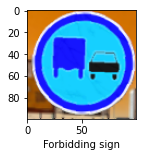

In [133]:
plot_img(test, test_y, 7878)
print("Predicted: ", classes[y_classes[7878]])
print("Acutal: ")

Predicted:  Information sign
Acutal: 


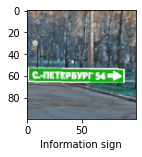

In [134]:
plot_img(test, test_y,17008)
print("Predicted: ", classes[y_classes[17008]])
print("Acutal: ")